
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [4]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LinearD

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [5]:
X_train = ha.drop(columns=["cp"])
y_train = ha["cp"]

knn_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier()),
    ]
)

tree_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("tree", DecisionTreeClassifier()),
    ]
)

lda_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lda", LinearD()),
    ]
)

knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
lda_model.fit(X_train, y_train)

# coefs = model.coef_  # This line caused an error because KNeighborsClassifier does not have a coef_ attribute
# print(coefs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_model, X_train, y_train,
                            cv=5, scoring="accuracy")
cv_scores.mean()

np.float64(0.9962962962962963)

In [9]:
cross_val_score(knn_model, X_train, y_train,
                            cv=5, scoring="f1_macro").mean()

np.float64(0.996078431372549)

In [10]:
precision_cp0 = cross_val_score(knn_model, X_train, ha["cp_is_0"],
                                  cv=5, scoring="precision").mean()

recall_cp0 = cross_val_score(knn_model, X_train, ha["cp_is_0"],
                               cv=5, scoring="recall").mean()

f1score_cp0 = cross_val_score(knn_model, X_train, ha["cp_is_0"],
                                cv=5, scoring="f1").mean()

precision_cp0, recall_cp0, f1score_cp0

(np.float64(0.9923076923076923),
 np.float64(1.0),
 np.float64(0.996078431372549))

In [11]:
precision_cp1 = cross_val_score(knn_model, X_train, ha["cp_is_1"],
                                  cv=5, scoring="precision").mean()

recall_cp1 = cross_val_score(knn_model, X_train, ha["cp_is_1"],
                               cv=5, scoring="recall").mean()

f1score_cp1 = cross_val_score(knn_model, X_train, ha["cp_is_1"],
                                cv=5, scoring="f1").mean()

precision_cp1, recall_cp1, f1score_cp1

(np.float64(1.0),
 np.float64(0.9777777777777779),
 np.float64(0.9882352941176471))

In [13]:
cross_val_score(knn_model, X_train, ha["cp_is_1"],
                                  cv=5, scoring="precision")

array([1., 1., 1., 1., 1.])

In [15]:
cross_val_score(knn_model, X_train, ha["cp_is_1"],
                               cv=5, scoring="recall")

array([1.        , 1.        , 1.        , 1.        , 0.88888889])

In [16]:
precision_cp2 = cross_val_score(knn_model, X_train, ha["cp_is_2"],
                                  cv=5, scoring="precision").mean()

recall_cp2 = cross_val_score(knn_model, X_train, ha["cp_is_2"],
                               cv=5, scoring="recall").mean()

f1score_cp2 = cross_val_score(knn_model, X_train, ha["cp_is_2"],
                                cv=5, scoring="f1").mean()

precision_cp2, recall_cp2, f1score_cp2

(np.float64(1.0), np.float64(1.0), np.float64(1.0))

In [17]:
precision_cp3 = cross_val_score(knn_model, X_train, ha["cp_is_3"],
                                  cv=5, scoring="precision").mean()

recall_cp3 = cross_val_score(knn_model, X_train, ha["cp_is_3"],
                               cv=5, scoring="recall").mean()

f1score_cp3 = cross_val_score(knn_model, X_train, ha["cp_is_3"],
                                cv=5, scoring="f1").mean()

precision_cp3, recall_cp3, f1score_cp3

(np.float64(1.0), np.float64(1.0), np.float64(1.0))

In [18]:
dt_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth=2))]
)

dt_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2))])

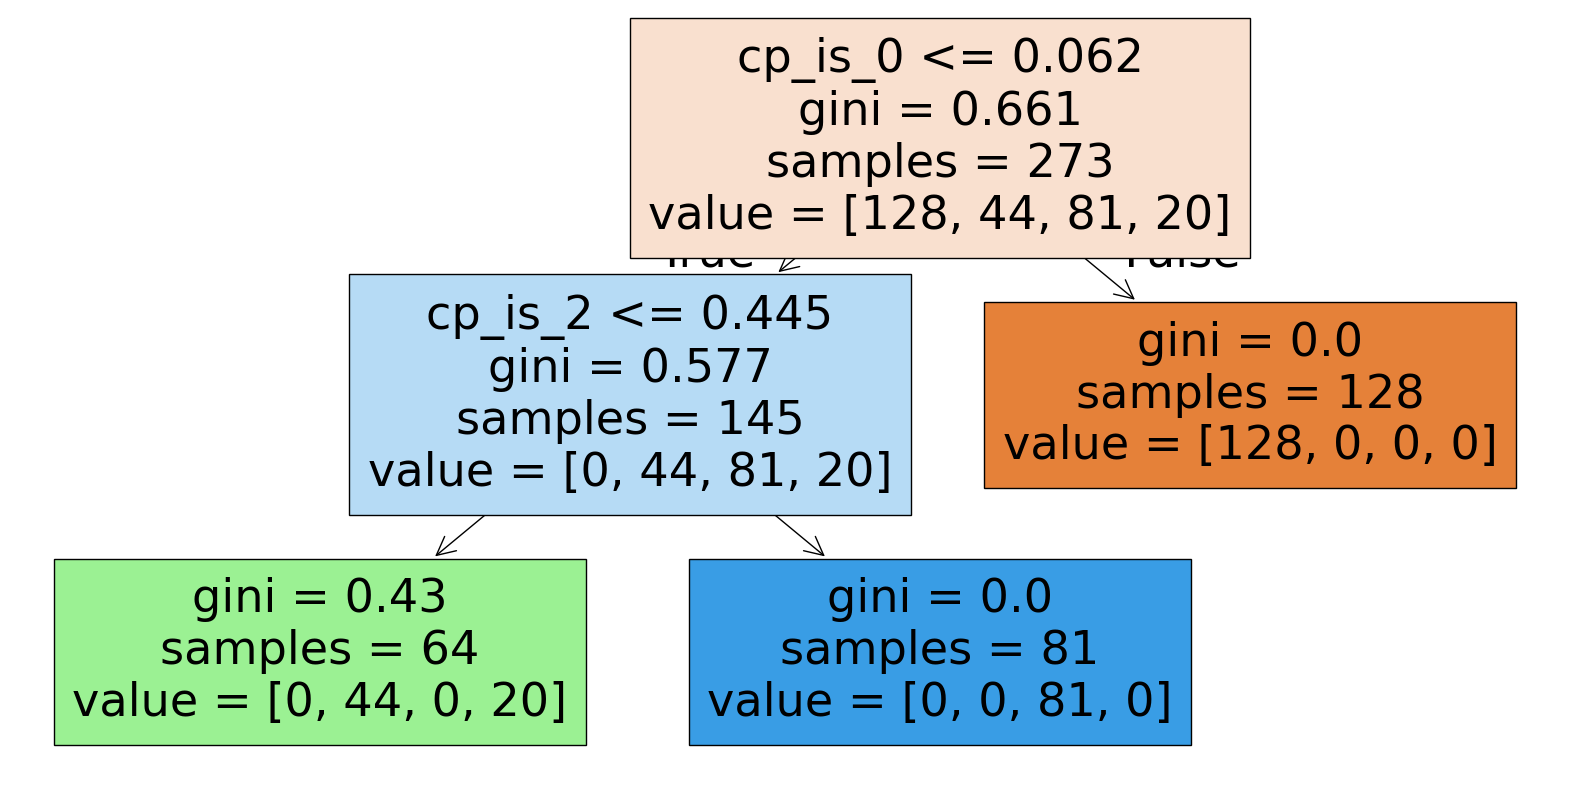

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Make the plot larger for better readability
plot_tree(dt_model.named_steps["model"], feature_names=X_train.columns.tolist(), filled=True)
plt.show()

In [23]:
lda_accuracy = cross_val_score(lda_model, X_train, y_train, cv=5, scoring="accuracy").mean()
print(f"LDA Model - Mean Accuracy: {lda_accuracy:.4f}")

LDA Model - Mean Accuracy: 1.0000


In [24]:
lda_f1_macro = cross_val_score(lda_model, X_train, y_train, cv=5, scoring="f1_macro").mean()
print(f"LDA Model - Mean Macro F1 Score: {lda_f1_macro:.4f}")

LDA Model - Mean Macro F1 Score: 1.0000


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [26]:
X_train = ha[["trtbps", "chol", "age"]]
y_train = ha["cp_is_3"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [28]:
cross_val_score(logistic_model, X_train, y_train,
                                  cv=5, scoring="precision").mean()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

np.float64(0.0)

In [29]:
cross_val_score(logistic_model, X_train, y_train,
                               cv=5, scoring="recall").mean()

np.float64(0.0)

In [30]:
cross_val_score(logistic_model, X_train, y_train,
                                cv=5, scoring="f1").mean()

np.float64(0.0)

In [31]:
X_train = ha[["trtbps", "chol", "age"]]
y_train = ha["cp_is_0"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [32]:
cross_val_score(logistic_model, X_train, y_train,
                                  cv=5, scoring="precision").mean()

np.float64(0.5402229712211564)

In [33]:
cross_val_score(logistic_model, X_train, y_train,
                               cv=5, scoring="recall").mean()

np.float64(0.4144615384615385)

In [34]:
cross_val_score(logistic_model, X_train, y_train,
                                cv=5, scoring="f1").mean()

np.float64(0.4624250522492891)

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [36]:
ha_01 = ha[(ha["cp"] == 0) | (ha["cp"] == 1)]

X_train = ha_01[["trtbps", "chol", "age"]]
y_train = ha_01["cp"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [37]:
roc_auc_01 = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring="roc_auc").mean()
print(f"ROC-AUC for cp categories 0 and 1: {roc_auc_01:.4f}")

ROC-AUC for cp categories 0 and 1: 0.6017
